In [2]:
# Importing pandas
import pandas as pd

In [3]:
print(pd)

<module 'pandas' from 'c:\\Users\\NDUKWE\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\pandas\\__init__.py'>


Series -> One dimensional arrays that can store various data types. 

In [4]:
# converting tuple to series
h = ('AA', '2012-02-01', 100, 10.2)
s = pd.Series(h)

type(s)

pandas.core.series.Series

In [5]:
s

0            AA
1    2012-02-01
2           100
3          10.2
dtype: object

In [6]:
# converting dict to Series
d = {'name': 'IBM', 'date':'2010-09-08','shares':100, 'price':10.2}
ds = pd.Series(d)
print(d)
print(ds)

{'name': 'IBM', 'date': '2010-09-08', 'shares': 100, 'price': 10.2}
name             IBM
date      2010-09-08
shares           100
price           10.2
dtype: object


In [7]:
type(ds)

pandas.core.series.Series

In [8]:
m =  ['Jim', '2001-08-02', 90, 3.2]
m = pd.Series(m, index=['name', 'date', 'amount', 'percentage'])
m

name                 Jim
date          2001-08-02
amount                90
percentage           3.2
dtype: object

In [9]:
m['percentage']

3.2

In [10]:
m[['name', 'percentage']]

name          Jim
percentage    3.2
dtype: object

DataFrame -> Two Dimensional arrays (row and colum index) 

In [11]:
data = {
    'name': [ 'Jim', 'Ray', 'Paul'  ],
    'shares': [ '10', '13', '12'],
    'price': [ '200', '131', '144'],
    'color':  [ 'blue', 'red', 'pink'],
}

In [12]:
data

{'name': ['Jim', 'Ray', 'Paul'],
 'shares': ['10', '13', '12'],
 'price': ['200', '131', '144'],
 'color': ['blue', 'red', 'pink']}

In [13]:
df = pd.DataFrame(data=data)
type(df)


pandas.core.frame.DataFrame

In [14]:
df

,name,shares,price,color
0,Jim,10,200,blue
1,Ray,13,131,red
2,Paul,12,144,pink


In [15]:
df['size'] = ['big', 'small', 'large']
df

,name,shares,price,color,size
0,Jim,10,200,blue,big
1,Ray,13,131,red,small
2,Paul,12,144,pink,large


In [16]:
df['age'] = 'null'
df

,name,shares,price,color,size,age
0,Jim,10,200,blue,big,null
1,Ray,13,131,red,small,null
2,Paul,12,144,pink,large,null


In [17]:
df.index = ['one','two', 'three']
df

,name,shares,price,color,size,age
one,Jim,10,200,blue,big,null
two,Ray,13,131,red,small,null
three,Paul,12,144,pink,large,null


In [18]:
df.set_index(['name']) #inplace = True -> makes it permanent
df

,name,shares,price,color,size,age
one,Jim,10,200,blue,big,null
two,Ray,13,131,red,small,null
three,Paul,12,144,pink,large,null


In [19]:
df['shares']

one      10
two      13
three    12
Name: shares, dtype: object

In [20]:
df.loc['one'] # select a single row

name       Jim
shares      10
price      200
color     blue
size       big
age       null
Name: one, dtype: object

In [21]:
df.loc[:, 'shares']

one      10
two      13
three    12
Name: shares, dtype: object

In [22]:
df.loc['one',:]

name       Jim
shares      10
price      200
color     blue
size       big
age       null
Name: one, dtype: object

In [23]:
del df['age']

In [24]:
df

,name,shares,price,color,size
one,Jim,10,200,blue,big
two,Ray,13,131,red,small
three,Paul,12,144,pink,large


In [25]:
df.drop('shares', axis = 1)

,name,price,color,size
one,Jim,200,blue,big
two,Ray,131,red,small
three,Paul,144,pink,large


In [26]:
df.drop('two', axis=0)

,name,shares,price,color,size
one,Jim,10,200,blue,big
three,Paul,12,144,pink,large


In [27]:
import pandas as pd

# Reading files 
casts = pd.read_csv('cast.csv', index_col=None)
casts.head() # Getting the first five elements of the DataFrame

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [28]:
titles = pd.read_csv('titles.csv', index_col=None) # if err -> encoding= 'utf-8'
titles.tail() #getting the last five elements of the DataFrame

,title,year
49995,Rebel,1970
49996,Suzanne,1996
49997,Bomba,2013
49998,Aao Jao Ghar Tumhara,1984
49999,Mrs. Munck,1995


In [29]:
len(titles)

50000

Data Operations 

In [30]:
# row and column selection 

t = titles['title']
type(t)

pandas.core.series.Series

In [31]:
t.head()

0             The Rising Son
1    The Thousand Plane Raid
2           Crucea de piatra
3                    Country
4                 Gaiking II
Name: title, dtype: object

In [32]:
# filtering data

after85 = titles[titles['year'] > 1985] # movies after 1985
after85.head()

,title,year
0,The Rising Son,1990
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011
5,Medusa (IV),2015


In [33]:
t = titles
movies90 = t[(t['year'] >= 1990) & (t['year'] < 2000)] # display movies in the year 1990 - 1999
movies90 

,title,year
0,The Rising Son,1990
2,Crucea de piatra,1993
12,Poka Makorer Ghar Bosoti,1996
19,Maa Durga Shakti,1999
24,Conflict of Interest,1993
...,...,...
49969,Chi mei wang liang,1998
49979,Gagay: Prinsesa ng brownout,1993
49987,I Won't Dance,1992
49996,Suzanne,1996


In [34]:
# sorting

macbeth = t[t['title'] == 'Macbeth'] # find all movies named as Macbeth
macbeth.head()

,title,year
4226,Macbeth,1913
9322,Macbeth,2006
11722,Macbeth,2013
17166,Macbeth,1997
25847,Macbeth,1998


In [35]:
macbeth.sort_index() # default is sorted by index 

,title,year
4226,Macbeth,1913
9322,Macbeth,2006
11722,Macbeth,2013
17166,Macbeth,1997
25847,Macbeth,1998


In [36]:
macbeth.sort_values('year') # sorting by year

,title,year
4226,Macbeth,1913
17166,Macbeth,1997
25847,Macbeth,1998
9322,Macbeth,2006
11722,Macbeth,2013


In [37]:
casts 

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
74996,Mia fora kai ena... moro,2011,Penelope Anastasopoulou,actress,Popi voulkanizater,11.0
74997,The Magician King,2004,Tiannah Anastassiades,actress,Unicycle Race Attendant,NaN
74998,Festival of Lights,2010,Zoe Anastassiou,actress,Guidance Counselor,20.0
74999,Toxic Tutu,2016,Zoe Anastassiou,actress,Demon of Toxicity,NaN


In [38]:
# Null Values
casts.loc[3:4]

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [39]:
c = casts
c['n'].isnull().head()

0    False
1    False
2    False
3     True
4     True
Name: n, dtype: bool

In [40]:
c[c['n'].isnull()].head()

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN


In [41]:
c_fill = c[c['n'].isnull()].fillna('NA') # can also use ffill and bfill
c_fill


,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NA
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NA
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NA
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NA
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NA
...,...,...,...,...,...,...
74984,Ovum,2015,Christina Rosas Anastasiou,actress,Fertility Clinic Receptionist,NA
74985,7 avlu,2009,Evmorfia Anastasiou,actress,Eleni,NA
74993,I teliki apopliromi,2013,Mara Anastasopoulou,actress,Marina's friend,NA
74997,The Magician King,2004,Tiannah Anastassiades,actress,Unicycle Race Attendant,NA


In [42]:
# String Operations 

t = titles
t[t['title'] == 'Maa'] # searching for the movie Maa


,title,year
38880,Maa,1968


In [43]:
t[t['title'].str.startswith('Maa')].head()

,title,year
19,Maa Durga Shakti,1999
334,Maarek hob,2004
3046,Maa Aur Mamta,1970
6304,Maampazhakkaalam,2004
7470,Maa Vaibhav Laxmi,1989


In [44]:
# Count values 

t['year'].value_counts().head() # number of years for each year in the DataFrame

2016    2363
2017    2138
2015    1849
2014    1701
2013    1609
Name: year, dtype: int64

In [45]:
c['type'].value_counts().head() # number of actors or actresses in the Dataframe

actor      50000
actress    25001
Name: type, dtype: int64

<Axes: xlabel='year'>

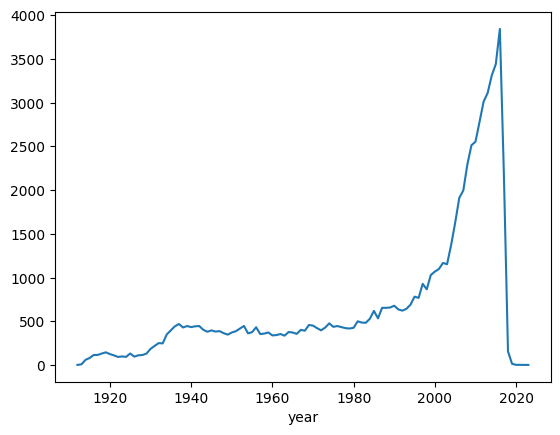

In [46]:
# GroupBy 

c_group = c.groupby(['year']).size()
c_group.plot()


In [47]:
# merge 

release = pd.read_csv('release_dates.csv', index_col = None) 
release


,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20
...,...,...,...,...
49995,Botched,2007,UK,2008-04-18
49996,Botched,2007,Peru,2010-01-21
49997,"Bote, dyaryo, garapa",1989,Philippines,1989-05-26
49998,Both Barrels Blazing,1945,USA,1945-05-17


In [48]:
c_amelia = casts[casts['title'] == 'Amelia']
c_amelia

,title,year,name,type,character,n
5767,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0
23319,Amelia,2009,Jeremy Akerman,actor,Sheriff,19.0


In [49]:
release[release['title'] == 'Amelia']

,title,year,country,date
20543,Amelia,1966,Mexico,1966-03-10
20544,Amelia,2009,Canada,2009-10-23
20545,Amelia,2009,USA,2009-10-23
20546,Amelia,2009,Australia,2009-11-12
20547,Amelia,2009,Singapore,2009-11-12
20548,Amelia,2009,Ireland,2009-11-13
20549,Amelia,2009,Mexico,2009-11-13
20550,Amelia,2009,UK,2009-11-13
20551,Amelia,2009,Spain,2009-11-20
20552,Amelia,2009,Philippines,2009-12-02


In [50]:
c_amelia.merge(release)

,title,year,name,type,character,n,country,date
0,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Canada,2009-10-23
1,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,USA,2009-10-23
2,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Australia,2009-11-12
3,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Singapore,2009-11-12
4,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Ireland,2009-11-13
5,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Mexico,2009-11-13
6,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,UK,2009-11-13
7,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Spain,2009-11-20
8,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Philippines,2009-12-02
9,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Italy,2009-12-23


In [51]:
c = casts[ casts['name']=='Aaron Abrams' ]
c.head(2)

,title,year,name,type,character,n
5765,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN
5766,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0


In [52]:
c.merge(casts, on=['title', 'year']).head()


,title,year,name_x,type_x,character_x,n_x,name_y,type_y,character_y,n_y
0,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Aaron Abrams,actor,Ralph Sinclair,NaN
1,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Christian Ackerman,actor,Simon,NaN
2,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0,Graham Abbey,actor,Officer #2,8.0
3,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0,Aaron Abrams,actor,Alex,4.0
4,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Aaron Abrams,actor,Slim Gordon,8.0


In [53]:
c_costar = c.merge (casts, on=['title', 'year'])
c_costar = c_costar[c_costar['name_y'] != 'Aaron Abrams']
c_costar.head()

,title,year,name_x,type_x,character_x,n_x,name_y,type_y,character_y,n_y
1,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Christian Ackerman,actor,Simon,NaN
2,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0,Graham Abbey,actor,Officer #2,8.0
5,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Jeremy Akerman,actor,Sheriff,19.0
8,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.0,Nick Alachiotis,actor,Baer Cornerman,38.0
9,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.0,Nick Alachiotis,actor,Undercard Boxer - Feldman,38.0
